# Preprocessing

In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

np.load = np_load_old

17465344/17464789 [==============================] - 14s 1us/step


In [0]:
print(len(XT))
print(len(Xt))

25000
25000


In [9]:
word_idx = imdb.get_word_index()

In [10]:
idx_word = dict([value,key] for key,value in word_idx.items())

In [11]:
actual_review = ' '.join([idx_word.get(idx-3,"?") for idx in XT[0]])

print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
def vectorize_sentences(sentences,dim=10000):
  outputs = np.zeros((len(sentences),dim))
  
  for i,idx in enumerate(sentences):
    outputs[i,idx] = 1
    
  return outputs

In [0]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [0]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

# Model

In [12]:
from keras import models
from keras.layers import Dense

In [13]:
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

W0809 00:31:02.959355  6744 deprecation_wrapper.py:119] From C:\Users\Hardik Kharbanda\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 00:31:02.981297  6744 deprecation_wrapper.py:119] From C:\Users\Hardik Kharbanda\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 00:31:02.984291  6744 deprecation_wrapper.py:119] From C:\Users\Hardik Kharbanda\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

W0808 18:14:46.460737 140668889552768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 18:14:46.481825 140668889552768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0808 18:14:46.488224 140668889552768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Training and validation

In [0]:
import matplotlib.pyplot as plt

In [0]:
x_val = X_train[:5000]
y_val = Y_train[:5000]

x_train_new = X_train[5000:]
y_train_new = Y_train[5000:]

In [0]:
hist = model.fit(x_train_new,y_train_new,epochs=20,batch_size=512,validation_data=(x_val,y_val))

W0807 10:21:10.522609 139853165717376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 265us/step - loss: 0.4726 - acc: 0.8065 - val_loss: 0.3671 - val_acc: 0.8576
Epoch 2/20
20000/20000 [==============================] - 1s 71us/step - loss: 0.2718 - acc: 0.9059 - val_loss: 0.2939 - val_acc: 0.8864
Epoch 3/20
20000/20000 [==============================] - 1s 71us/step - loss: 0.2025 - acc: 0.9306 - val_loss: 0.2697 - val_acc: 0.8916
Epoch 4/20
20000/20000 [==============================] - 1s 71us/step - loss: 0.1668 - acc: 0.9412 - val_loss: 0.2804 - val_acc: 0.8904
Epoch 5/20
20000/20000 [==============================] - 1s 70us/step - loss: 0.1407 - acc: 0.9516 - val_loss: 0.2834 - val_acc: 0.8898
Epoch 6/20
20000/20000 [==============================] - 1s 71us/step - loss: 0.1189 - acc: 0.9593 - val_loss: 0.3087 - val_acc: 0.8862
Epoch 7/20
20000/20000 [==============================] - 1s 70us/step - loss: 0.1058 - acc: 0.9648 - val_loss: 0.3275 - val_acc

In [0]:
h = hist.history

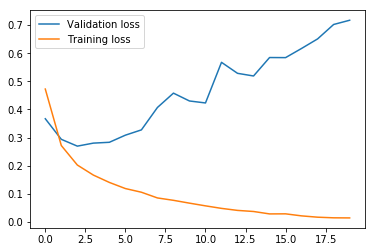

In [0]:
plt.plot(h['val_loss'],label="Validation loss")
plt.plot(h['loss'],label='Training loss')
plt.legend()
plt.show()

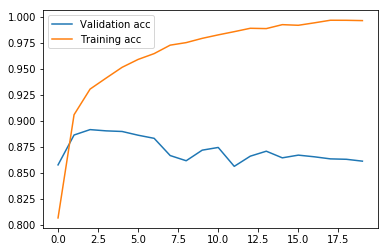

In [0]:
plt.plot(h['val_acc'],label="Validation acc")
plt.plot(h['acc'],label='Training acc')
plt.legend()
plt.show()

* With 20 epochs, the training accuracy increased but the validation accuracy decreased. This indicates overfitting on training data.
* From the above graph it is evident that the validation accuracy starts decreasing after 4 epochs.
* Hence, we train the model for four epochs to prevent overfitting



In [0]:
hist_new = model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

W0808 18:15:06.713642 140668889552768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 6s 286us/step - loss: 0.4726 - acc: 0.8065 - val_loss: 0.3671 - val_acc: 0.8576
Epoch 2/4
20000/20000 [==============================] - 2s 75us/step - loss: 0.2718 - acc: 0.9059 - val_loss: 0.2939 - val_acc: 0.8864
Epoch 3/4
20000/20000 [==============================] - 1s 69us/step - loss: 0.2025 - acc: 0.9306 - val_loss: 0.2697 - val_acc: 0.8916
Epoch 4/4
20000/20000 [==============================] - 1s 67us/step - loss: 0.1668 - acc: 0.9412 - val_loss: 0.2804 - val_acc: 0.8904


In [0]:
h_new = hist_new.history

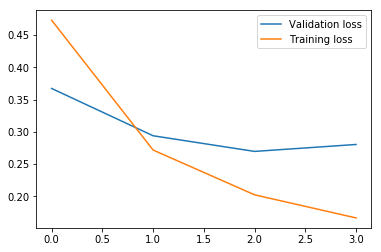

In [0]:
plt.plot(h_new['val_loss'],label="Validation loss")
plt.plot(h_new['loss'],label='Training loss')
plt.legend()
plt.show()

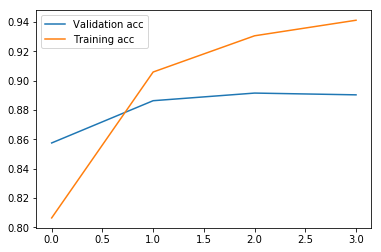

In [0]:
plt.plot(h_new['val_acc'],label="Validation acc")
plt.plot(h_new['acc'],label='Training acc')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_train_new,y_train_new)[1]

20000/20000 [==============================] - 2s 79us/step


0.95955

In [0]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 2s 88us/step


0.87928

We have achieved an accuracy of about 88 % on testing data.